In [587]:
import pandas as pd

In [588]:
df_lyon = pd.read_csv('listings_paris.csv', sep=',', encoding='utf-8')
df_paris = pd.read_csv('listings_paris.csv', sep=',', encoding='utf-8')

In [589]:
df_lyon.columns == df_paris.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [590]:
# Liste des colonnes peu pertinentes pour la prédiction du prix
cols_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
    'description', 'neighborhood_overview', 'picture_url', 'host_id',
    'host_url', 'host_name', 'host_about', 'host_thumbnail_url',
    'host_picture_url', 'host_verifications', 'calendar_updated',
    'calendar_last_scraped', 'first_review', 'last_review', 'license','neighbourhood_group_cleansed'
]

# Suppression des colonnes non pertinentes
df_paris.drop(columns=cols_to_drop, inplace=True)
df_lyon.drop(columns=cols_to_drop, inplace=True)

In [591]:
df = pd.concat([df_paris, df_lyon], ignore_index=True)

In [592]:
df

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2008-10-14,"Paris, France",within an hour,100%,67%,f,Alésia,1.0,1.0,t,...,5.00,5.00,5.00,5.00,t,1,1,0,0,0.05
1,2009-02-14,"Paris, France",within an hour,100%,91%,NaN,Saint-Paul - Ile Saint-Louis,2.0,4.0,t,...,4.82,4.85,4.96,4.59,f,1,1,0,0,2.26
2,2008-08-30,"Paris, France",within an hour,100%,68%,t,Le Marais,2.0,10.0,t,...,4.92,4.89,4.94,4.74,f,2,2,0,0,2.20
3,2009-06-18,"Paris, France",NaN,NaN,0%,f,Gare du Nord - Gare de I'Est,1.0,1.0,t,...,5.00,5.00,5.00,5.00,f,1,1,0,0,0.03
4,2009-07-29,"New York, NY",NaN,NaN,NaN,f,Châtelet - Les Halles - Beaubourg,2.0,4.0,t,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182057,2015-07-15,"Paris, France",NaN,NaN,NaN,f,NaN,1.0,2.0,f,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
182058,2024-08-11,NaN,NaN,NaN,NaN,f,NaN,1.0,1.0,f,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
182059,2017-10-30,"Paris, France",within an hour,96%,98%,f,Châtelet - Les Halles - Beaubourg,108.0,114.0,t,...,NaN,NaN,NaN,NaN,t,107,107,0,0,NaN
182060,2017-10-30,"Paris, France",within an hour,96%,98%,f,Châtelet - Les Halles - Beaubourg,108.0,114.0,t,...,NaN,NaN,NaN,NaN,t,107,107,0,0,NaN


In [593]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

host_since                                       0.009887
host_location                                   20.062396
host_response_time                              42.645912
host_response_rate                              42.645912
host_acceptance_rate                            32.887698
host_is_superhost                                2.143226
host_neighbourhood                              64.661489
host_listings_count                              0.009887
host_total_listings_count                        0.009887
host_has_profile_pic                             0.009887
host_identity_verified                           0.009887
neighbourhood                                   49.582011
neighbourhood_cleansed                           0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates  

In [594]:
# Imputation des valeurs manquantes avec la médiane
columns_to_impute = [
    'host_listings_count',
    'host_total_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'property_type',
    'accommodates',
    'bathrooms'
]

for column in columns_to_impute:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\2407239252.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\2407239252.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [595]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

host_since                                       0.009887
host_location                                   20.062396
host_response_time                              42.645912
host_response_rate                              42.645912
host_acceptance_rate                            32.887698
host_is_superhost                                2.143226
host_neighbourhood                              64.661489
host_listings_count                              0.000000
host_total_listings_count                        0.000000
host_has_profile_pic                             0.000000
host_identity_verified                           0.000000
neighbourhood                                   49.582011
neighbourhood_cleansed                           0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates  

In [596]:
df.dropna(inplace=True)

In [597]:
df.shape

(15168, 53)

In [598]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].min(), inplace=True)
    else:
        df[column].fillna('', inplace=True)  # Pour les colonnes non numériques, on remplace par une chaîne vide

C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\1202095039.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('', inplace=True)  # Pour les colonnes non numériques, on remplace par une chaîne vide
C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\1202095039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [599]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

host_since                                      0.0
host_location                                   0.0
host_response_time                              0.0
host_response_rate                              0.0
host_acceptance_rate                            0.0
host_is_superhost                               0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
neighbourhood                                   0.0
neighbourhood_cleansed                          0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms                                       0.0
bathrooms_te

In [600]:
df["price"]

0         $100.00
5         $150.00
7          $80.00
8         $120.00
10        $201.00
           ...   
180836     $89.00
180891    $118.00
180915    $261.00
181025    $154.00
181637     $58.00
Name: price, Length: 15168, dtype: object

In [601]:
df

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2008-10-14,"Paris, France",within an hour,100%,67%,f,Alésia,1.0,1.0,t,...,5.00,5.00,5.00,5.00,t,1,1,0,0,0.05
5,2009-08-24,"Paris, France",within a day,100%,75%,f,République,1.0,1.0,t,...,4.98,4.87,4.87,4.90,f,1,1,0,0,0.36
7,2009-10-01,France,within a few hours,100%,100%,t,République,2.0,2.0,t,...,4.92,4.92,4.92,4.69,f,2,2,0,0,0.09
8,2009-10-08,"Paris, France",within a day,100%,100%,f,Place d'Italie - Quartier Chinois,1.0,1.0,t,...,4.94,4.95,4.83,4.77,f,1,1,0,0,0.81
10,2009-10-28,"Paris, France",within an hour,100%,78%,f,XI Arrondissement,1.0,3.0,t,...,4.84,4.87,4.81,4.65,t,1,1,0,0,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180836,2023-03-01,"London, United Kingdom",within an hour,99%,98%,f,Al Qusais Industrial Area 2,82.0,85.0,t,...,5.00,5.00,5.00,5.00,f,48,48,0,0,1.00
180891,2015-08-23,"Paris, France",within an hour,100%,100%,t,Tour Eiffel - Champ de Mars,13.0,15.0,t,...,4.50,4.50,5.00,4.50,t,11,11,0,0,2.00
180915,2015-02-24,"Paris, France",within an hour,100%,100%,f,II Arrondissement,174.0,178.0,t,...,5.00,5.00,5.00,5.00,t,131,131,0,0,1.00
181025,2023-03-01,"London, United Kingdom",within an hour,99%,98%,f,Al Qusais Industrial Area 2,82.0,85.0,t,...,4.33,4.33,5.00,4.33,f,48,48,0,0,3.00


In [602]:
df.dtypes

host_since                                       object
host_location                                    object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                    

In [603]:
import numpy as np

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [604]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

host_since                                      0.0
host_location                                   0.0
host_response_time                              0.0
host_response_rate                              0.0
host_acceptance_rate                            0.0
host_is_superhost                               0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
neighbourhood                                   0.0
neighbourhood_cleansed                          0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms                                       0.0
bathrooms_te

In [605]:

# Extraire le symbole de la colonne 'price'
df['currency_symbol'] = df['price'].str.extract(r'(\D)')

#On retire le symbole de la colonne 'price'
df['price'] = df['price'].str.replace(r'(\D)', '', regex=True)

#O convertit la colonne 'price' en float
df['price'] = df['price'].astype(float)

In [606]:
df.dropna(subset=['price'], inplace=True)

df['has_availability'].fillna('f', inplace=True)

C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\3516684123.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['has_availability'].fillna('f', inplace=True)


In [607]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

host_since                                      0.0
host_location                                   0.0
host_response_time                              0.0
host_response_rate                              0.0
host_acceptance_rate                            0.0
host_is_superhost                               0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
neighbourhood                                   0.0
neighbourhood_cleansed                          0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms                                       0.0
bathrooms_te

In [608]:
print(df['currency_symbol'].unique())
df.drop(columns=['currency_symbol'], inplace=True)

['$']


In [609]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

host_since                                      0.0
host_location                                   0.0
host_response_time                              0.0
host_response_rate                              0.0
host_acceptance_rate                            0.0
host_is_superhost                               0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
neighbourhood                                   0.0
neighbourhood_cleansed                          0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms                                       0.0
bathrooms_te

In [610]:
df

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2008-10-14,"Paris, France",within an hour,100%,67%,f,Alésia,1.0,1.0,t,...,5.00,5.00,5.00,5.00,t,1,1,0,0,0.05
5,2009-08-24,"Paris, France",within a day,100%,75%,f,République,1.0,1.0,t,...,4.98,4.87,4.87,4.90,f,1,1,0,0,0.36
7,2009-10-01,France,within a few hours,100%,100%,t,République,2.0,2.0,t,...,4.92,4.92,4.92,4.69,f,2,2,0,0,0.09
8,2009-10-08,"Paris, France",within a day,100%,100%,f,Place d'Italie - Quartier Chinois,1.0,1.0,t,...,4.94,4.95,4.83,4.77,f,1,1,0,0,0.81
10,2009-10-28,"Paris, France",within an hour,100%,78%,f,XI Arrondissement,1.0,3.0,t,...,4.84,4.87,4.81,4.65,t,1,1,0,0,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180836,2023-03-01,"London, United Kingdom",within an hour,99%,98%,f,Al Qusais Industrial Area 2,82.0,85.0,t,...,5.00,5.00,5.00,5.00,f,48,48,0,0,1.00
180891,2015-08-23,"Paris, France",within an hour,100%,100%,t,Tour Eiffel - Champ de Mars,13.0,15.0,t,...,4.50,4.50,5.00,4.50,t,11,11,0,0,2.00
180915,2015-02-24,"Paris, France",within an hour,100%,100%,f,II Arrondissement,174.0,178.0,t,...,5.00,5.00,5.00,5.00,t,131,131,0,0,1.00
181025,2023-03-01,"London, United Kingdom",within an hour,99%,98%,f,Al Qusais Industrial Area 2,82.0,85.0,t,...,4.33,4.33,5.00,4.33,f,48,48,0,0,3.00


In [611]:
duplicates = df[df.duplicated()]
duplicates

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
91031,2008-10-14,"Paris, France",within an hour,100%,67%,f,Alésia,1.0,1.0,t,...,5.00,5.00,5.00,5.00,t,1,1,0,0,0.05
91036,2009-08-24,"Paris, France",within a day,100%,75%,f,République,1.0,1.0,t,...,4.98,4.87,4.87,4.90,f,1,1,0,0,0.36
91038,2009-10-01,France,within a few hours,100%,100%,t,République,2.0,2.0,t,...,4.92,4.92,4.92,4.69,f,2,2,0,0,0.09
91039,2009-10-08,"Paris, France",within a day,100%,100%,f,Place d'Italie - Quartier Chinois,1.0,1.0,t,...,4.94,4.95,4.83,4.77,f,1,1,0,0,0.81
91041,2009-10-28,"Paris, France",within an hour,100%,78%,f,XI Arrondissement,1.0,3.0,t,...,4.84,4.87,4.81,4.65,t,1,1,0,0,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180836,2023-03-01,"London, United Kingdom",within an hour,99%,98%,f,Al Qusais Industrial Area 2,82.0,85.0,t,...,5.00,5.00,5.00,5.00,f,48,48,0,0,1.00
180891,2015-08-23,"Paris, France",within an hour,100%,100%,t,Tour Eiffel - Champ de Mars,13.0,15.0,t,...,4.50,4.50,5.00,4.50,t,11,11,0,0,2.00
180915,2015-02-24,"Paris, France",within an hour,100%,100%,f,II Arrondissement,174.0,178.0,t,...,5.00,5.00,5.00,5.00,t,131,131,0,0,1.00
181025,2023-03-01,"London, United Kingdom",within an hour,99%,98%,f,Al Qusais Industrial Area 2,82.0,85.0,t,...,4.33,4.33,5.00,4.33,f,48,48,0,0,3.00


In [612]:
df.drop_duplicates(inplace=True)

In [613]:
df.shape

(7584, 53)

In [614]:
df.dtypes

host_since                                       object
host_location                                    object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                    

In [615]:
correlations = df.corr(numeric_only=True)
print(correlations)

                                              host_listings_count  \
host_listings_count                                      1.000000   
host_total_listings_count                                0.960941   
latitude                                                -0.017070   
longitude                                               -0.179527   
accommodates                                             0.063736   
bathrooms                                                0.101508   
bedrooms                                                 0.114472   
beds                                                     0.018480   
price                                                    0.053352   
minimum_nights                                           0.147257   
maximum_nights                                           0.333617   
minimum_minimum_nights                                   0.138429   
maximum_minimum_nights                                   0.455623   
minimum_maximum_nights            

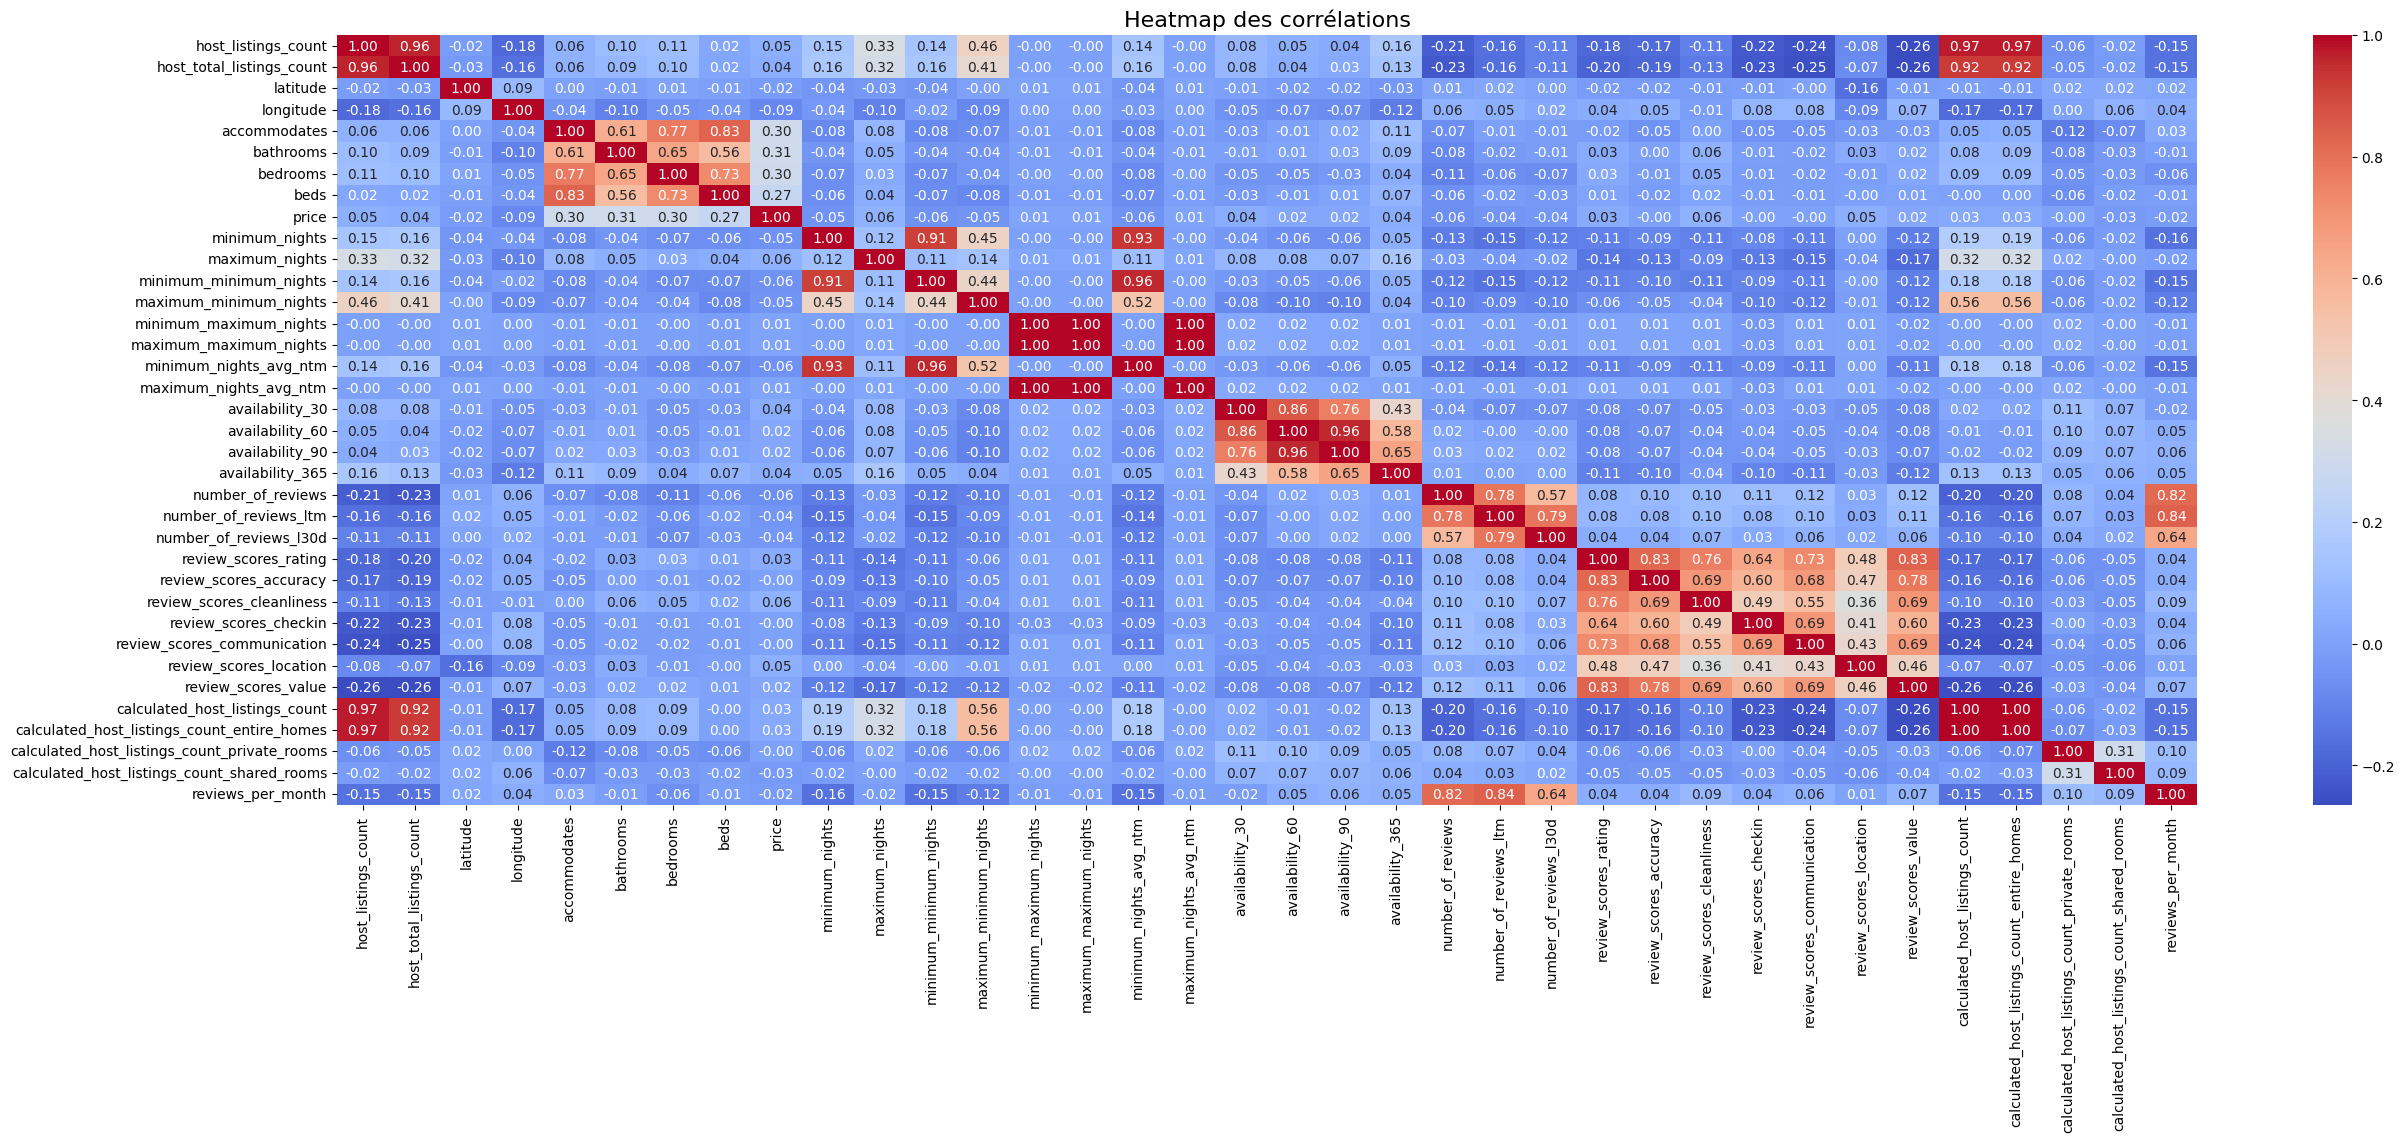

In [616]:
import seaborn as sns

import matplotlib.pyplot as plt

# Création du heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Ajouter un titre
plt.title("Heatmap des corrélations", fontsize=16)

# Afficher le graphique
plt.show()

In [617]:
correlations['price'].sort_values(ascending=False)

price                                           1.000000
bathrooms                                       0.307005
accommodates                                    0.303213
bedrooms                                        0.302101
beds                                            0.267146
maximum_nights                                  0.060791
review_scores_cleanliness                       0.057211
host_listings_count                             0.053352
review_scores_location                          0.051654
host_total_listings_count                       0.043299
availability_365                                0.042735
availability_30                                 0.041464
review_scores_rating                            0.033804
calculated_host_listings_count                  0.026784
calculated_host_listings_count_entire_homes     0.026715
availability_60                                 0.021439
availability_90                                 0.019958
review_scores_value            

In [618]:
df["room_type"]

0        Entire home/apt
5        Entire home/apt
7        Entire home/apt
8        Entire home/apt
10       Entire home/apt
              ...       
89805    Entire home/apt
89860    Entire home/apt
89884    Entire home/apt
89994    Entire home/apt
90606    Entire home/apt
Name: room_type, Length: 7584, dtype: object

In [619]:
# Mapping des types de chambres à des entiers
room_type_mapping = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2,
    'Hotel room': 3
}

# Application du mapping à la colonne room_type
df['room_type_encoded'] = df['room_type'].map(room_type_mapping)

# Vérification des résultats
print(df[['room_type', 'room_type_encoded']].head())

          room_type  room_type_encoded
0   Entire home/apt                  0
5   Entire home/apt                  0
7   Entire home/apt                  0
8   Entire home/apt                  0
10  Entire home/apt                  0


In [620]:
df.dtypes

host_since                                       object
host_location                                    object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                    

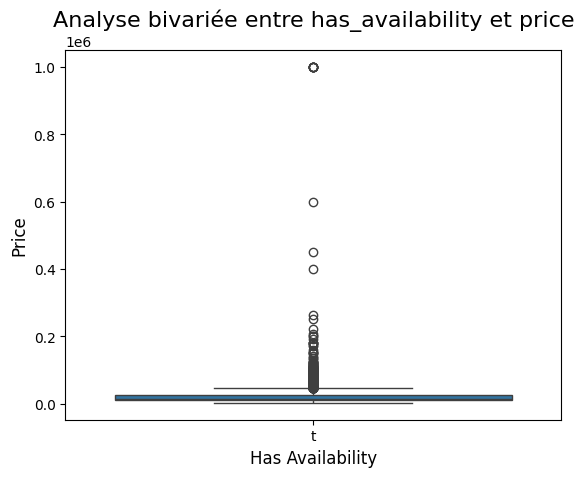

In [621]:
# Analyse bivariée entre has_availability et price
sns.boxplot(x='has_availability', y='price', data=df)

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre has_availability et price", fontsize=16)
plt.xlabel("Has Availability", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Afficher le graphique
plt.show()

In [622]:
# # Calculer la moyenne des prix par type de chambre
# room_type_price_mean = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

# # Créer un graphique en barres
# plt.figure(figsize=(10, 6))
# room_type_price_mean.plot(kind='bar', color='skyblue')

# # Ajouter un titre et des labels
# plt.title("Moyenne des prix par type de chambre", fontsize=16)
# plt.xlabel("Type de chambre", fontsize=12)
# plt.ylabel("Prix moyen", fontsize=12)

# # Afficher le graphique
# plt.xticks(rotation=45, ha='right')
# plt.show()

In [623]:
df.columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',

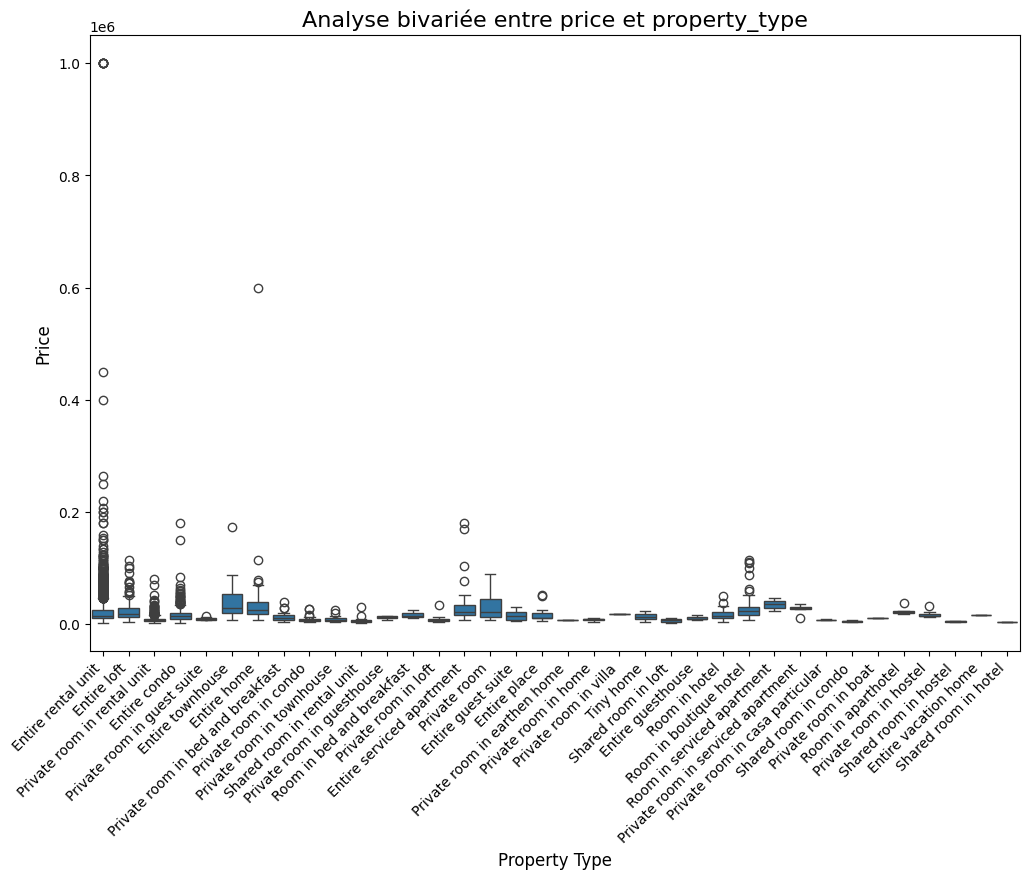

In [624]:
# Analyse bivariée entre price et property_type
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price', data=df)

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre price et property_type", fontsize=16)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Afficher le graphique
plt.show()

In [625]:
df["property_type"].unique()

array(['Entire rental unit', 'Entire loft', 'Private room in rental unit',
       'Entire condo', 'Private room in guest suite', 'Entire townhouse',
       'Entire home', 'Private room in bed and breakfast',
       'Private room in condo', 'Private room in townhouse',
       'Shared room in rental unit', 'Private room in guesthouse',
       'Room in bed and breakfast', 'Private room in loft',
       'Entire serviced apartment', 'Private room', 'Entire guest suite',
       'Entire place', 'Private room in earthen home',
       'Private room in home', 'Private room in villa', 'Tiny home',
       'Shared room in loft', 'Entire guesthouse', 'Room in hotel',
       'Room in boutique hotel', 'Room in serviced apartment',
       'Private room in serviced apartment',
       'Private room in casa particular', 'Shared room in condo',
       'Private room in boat', 'Room in aparthotel',
       'Private room in hostel', 'Shared room in hostel',
       'Entire vacation home', 'Shared room in hotel'

In [626]:

from sklearn.preprocessing import LabelEncoder

# Initialisation du LabelEncoder
le = LabelEncoder()

# Application du LabelEncoder sur la colonne property_type
df['property_type_encoded'] = le.fit_transform(df['property_type'])
df['room_type_encoder'] = le.fit_transform(df['room_type'])
df["neighbourhood_cleansed_encoded"] = le.fit_transform(df["neighbourhood_cleansed"])
df["host_is_superhost_encoded"] = le.fit_transform(df["host_is_superhost"])

# Vérification des résultats
print(df[['property_type', 'property_type_encoded']].sample(10))

                     property_type  property_type_encoded
75875           Entire rental unit                      6
52861           Entire rental unit                      6
13267           Entire rental unit                      6
16679           Entire rental unit                      6
42457           Entire rental unit                      6
15784           Entire rental unit                      6
13286           Entire rental unit                      6
27363           Entire rental unit                      6
9062   Private room in rental unit                     21
18776           Entire rental unit                      6


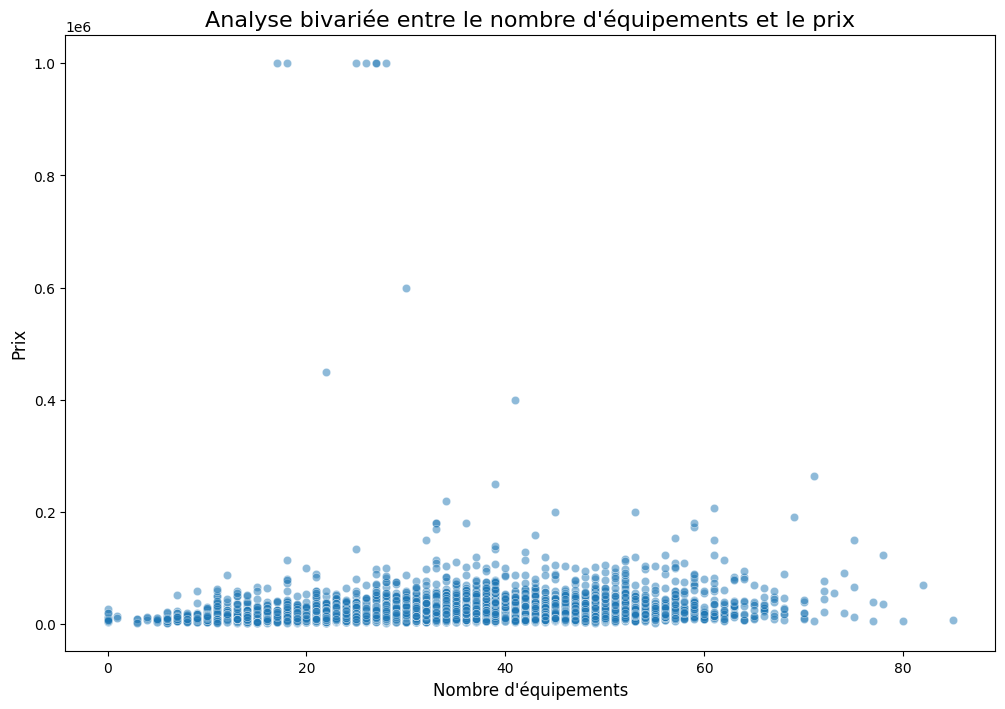

In [627]:
# Compter le nombre d'équipements pour chaque logement
df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)))

# Analyse bivariée entre amenities_count et price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='amenities_count', y='price', data=df, alpha=0.5)

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre le nombre d'équipements et le prix", fontsize=16)
plt.xlabel("Nombre d'équipements", fontsize=12)
plt.ylabel("Prix", fontsize=12)

# Afficher le graphique
plt.show()

C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\3418384127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room_type_encoded', y='price', data=df, inner="quartile", palette="muted")


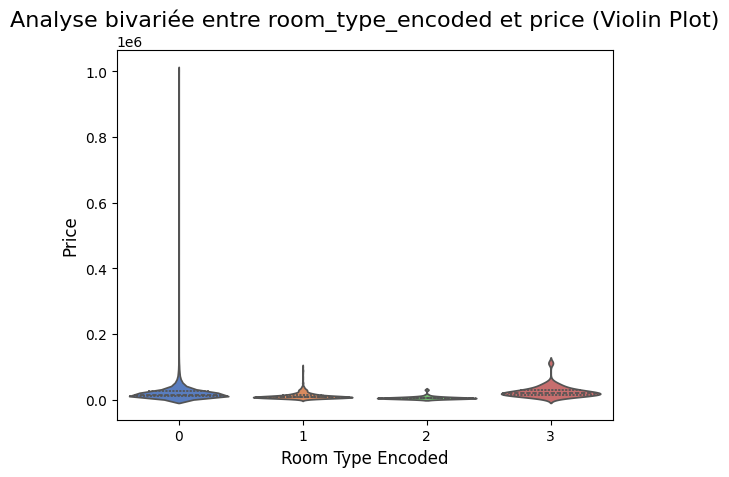

In [628]:
# Analyse bivariée entre room_type_encoded et price avec un graphique en violon
sns.violinplot(x='room_type_encoded', y='price', data=df, inner="quartile", palette="muted")

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre room_type_encoded et price (Violin Plot)", fontsize=16)
plt.xlabel("Room Type Encoded", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Afficher le graphique
plt.show()

In [629]:
df.dtypes


host_since                                       object
host_location                                    object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                    

In [631]:
from sklearn.preprocessing import LabelEncoder

# Encoder toutes les colonnes
for column in df.columns:
    if df[column].dtype == 'object':  # Si la colonne est de type object (catégorique)
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
    else:  # Si la colonne est numérique
        df[column] = df[column].fillna(0)  # Remplir les valeurs manquantes avec 0 (ou une autre valeur par défaut)

Accomodate , bathrooms, bed, property_type

In [632]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des colonnes pertinentes pour la prédiction
features = ['name', 'neighborhood_overview', 'host_name', 'host_listings_count', 'bathrooms', 'amenities', 'minimum_maximum_nights', 'first_review', 'last_review', 'review_scores_location']
target = 'price'

# Préparation des données
X = df[features]
y = df[target]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

KeyError: "['name', 'neighborhood_overview', 'host_name', 'first_review', 'last_review'] not in index"

In [ ]:
np.sqrt(mse)

np.float64(39156.74222289881)

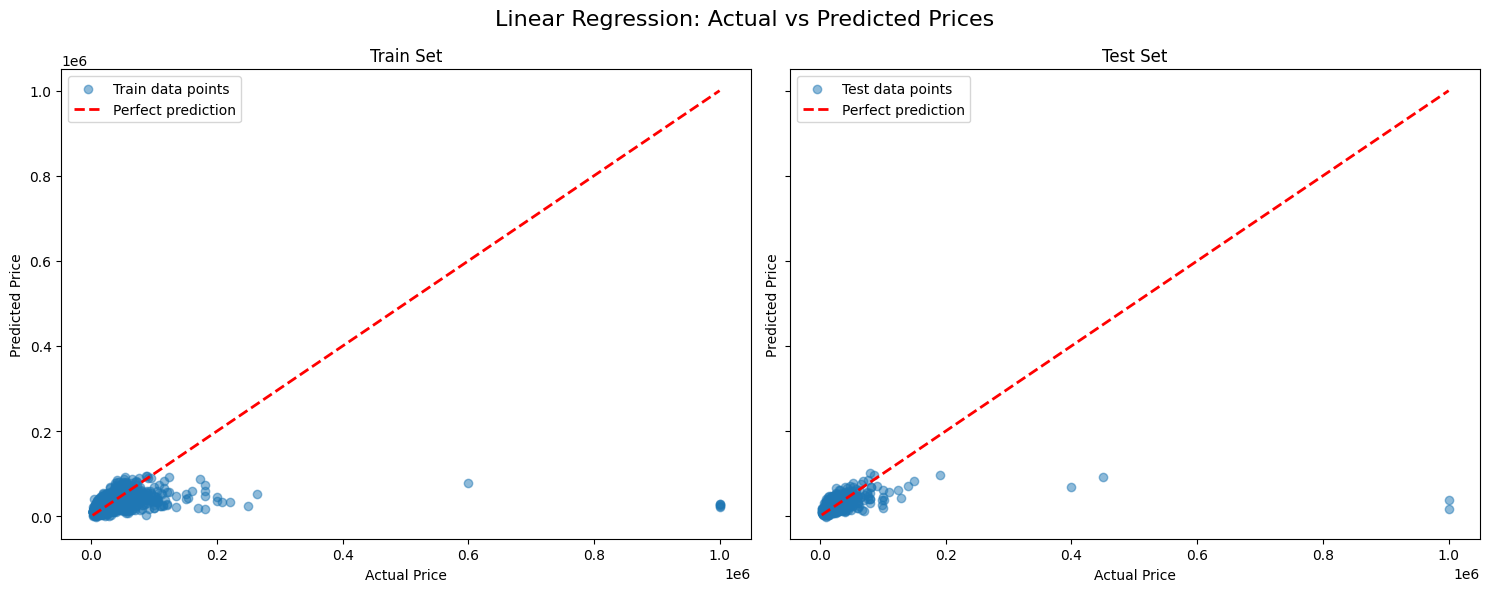

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

# Train set visualization
ax[0].scatter(y_train, model.predict(X_train), alpha=0.5, label="Train data points")
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2, label="Perfect prediction")
ax[0].set(xlabel="Actual Price", ylabel="Predicted Price", title="Train Set")
ax[0].legend()

# Test set visualization
ax[1].scatter(y_test, y_pred, alpha=0.5, label="Test data points")
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Perfect prediction")
ax[1].set(xlabel="Actual Price", ylabel="Predicted Price", title="Test Set")
ax[1].legend()

fig.suptitle("Linear Regression: Actual vs Predicted Prices", fontsize=16)

plt.tight_layout()
plt.show()
